In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
epoch=datetime.datetime.utcfromtimestamp(0)

In [83]:
#importing the datasets
missing_values=["NA","na"," ","na"]
data=pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')
df=data.parse('CustomerDemographic',na_values=missing_values)
d2=data.parse('Transactions',na_values=missing_values)
d3=data.parse('CustomerAddress',na_values=missing_values)

# CustomerDemographic


In [84]:
df.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   customer_id                          int64         
 1   first_name                           object        
 2   last_name                            object        
 3   gender                               object        
 4   past_3_years_bike_related_purchases  float64       
 5   DOB                                  datetime64[ns]
 6   job_title                            object        
 7   job_industry_category                object        
 8   wealth_segment                       object        
 9   deceased_indicator                   object        
 10  default                              object        
 11  owns_car                             object        
 12  tenure                               float64       
dtypes: datetime64[ns](1), float64(2),

In [85]:
df.shape

(4000, 13)

In [86]:
df.describe(include='all')

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
count,4000.000000,4000,3875,4000,3999.000000,3913,3494,3344,4000,4000,3698.0,4000,3913.000000
unique,NaN,3139,3725,6,NaN,3448,195,9,3,2,90.0,2,NaN
top,NaN,Timmie,Ramsdell,Female,NaN,1978-01-30 00:00:00,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100.0,Yes,NaN
freq,NaN,5,3,2037,NaN,7,45,799,2000,3998,113.0,2024,NaN
first,NaN,NaN,NaN,NaN,NaN,1843-12-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2002-03-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2000.500000,NaN,NaN,NaN,49.878970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.657041
std,1154.844867,NaN,NaN,NaN,68.720893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.660146
min,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,1000.750000,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000


In [87]:
df.isnull().sum()#no. of null values in each column

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      1
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [88]:
#converting the DOB into Age
df['DOB']=pd.to_datetime(df['DOB'])
df['birth_year']=df['DOB'].dt.year
df.drop('DOB',axis=1,inplace=True)
print(df['birth_year'].isnull().sum())
df['Age']=2020-df['birth_year']
df.drop('birth_year',axis=1,inplace=True)

87


In [89]:
#dropping unnecessary data
df.drop(['job_title','default'],axis=1,inplace=True)
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,F,93.0,Health,Mass Customer,N,Yes,11.0,67.0
1,2,Eli,Bockman,Male,81.0,Financial Services,Mass Customer,N,Yes,16.0,40.0
2,3,Arlin,Dearle,Male,61.0,Property,Mass Customer,N,Yes,15.0,66.0
3,4,Talbot,NaN,Male,33.0,IT,Mass Customer,N,No,7.0,59.0
4,5,Sheila-kathryn,Calton,Female,3997.0,NaN,Affluent Customer,N,Yes,8.0,43.0


In [90]:

df.drop(['last_name'],axis=1,inplace=True)

In [91]:
#selecting the columns with float and int values
cols=df.select_dtypes([np.int64,np.float64]).columns
print(cols)

Index(['customer_id', 'past_3_years_bike_related_purchases', 'tenure', 'Age'], dtype='object')


In [92]:
#filling the nan value of these columns using mean
for i in range(len(cols)):
    df[cols[i]].fillna((df[cols[i]].mean()),inplace=True)
    

In [93]:
df['gender'].value_counts()

Female    2037
Male      1872
U           88
Femal        1
F            1
M            1
Name: gender, dtype: int64

In [94]:
#replacing the gender only to Male,Female and Unknown.
df['gender'].replace(['F','Femal','M'],['Female','Female','Male'],inplace=True)

In [95]:
#Sorting according to the bikes purchased in last 3 years
df=df.sort_values('past_3_years_bike_related_purchases',ascending=False)
df.head()

,customer_id,first_name,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
4,5,Sheila-kathryn,Female,3997.0,NaN,Affluent Customer,N,Yes,8.0,43.0
1097,1098,Maure,Female,99.0,Financial Services,Mass Customer,N,Yes,12.0,31.0
2331,2332,Jeff,Male,99.0,Property,High Net Worth,N,Yes,10.0,43.0
1451,1452,Zachery,Male,99.0,Retail,Mass Customer,N,No,20.0,65.0
1456,1457,Leonore,Female,99.0,NaN,Affluent Customer,N,Yes,12.0,42.0


Text(0, 0.5, 'past_3_years_bike_related_purchases')

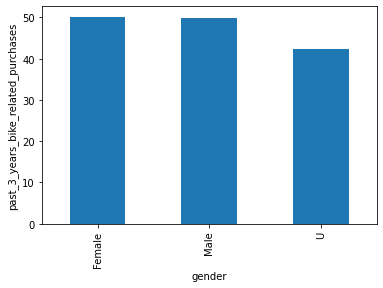

In [96]:
#graph of bikes purchased in past 3 years VS gender
df.groupby('gender').agg('mean')["past_3_years_bike_related_purchases"].plot(kind='bar')
plt.ylabel("past_3_years_bike_related_purchases")

Text(0, 0.5, 'past_3_years_bike_related_purchases')

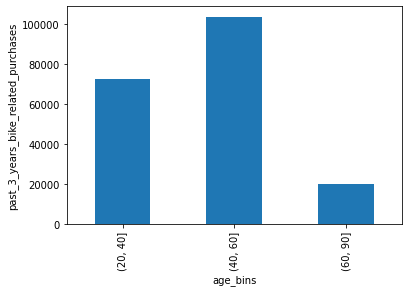

In [97]:
#Age range VS past 3 year bikes purchase
df['age_bins']=pd.cut(df['Age'],bins=[20,40,60,90])
df.groupby('age_bins').agg('sum')['past_3_years_bike_related_purchases'].plot(kind='bar')
plt.ylabel('past_3_years_bike_related_purchases')

Text(0, 0.5, 'past_3_years_bike_related_purchases')

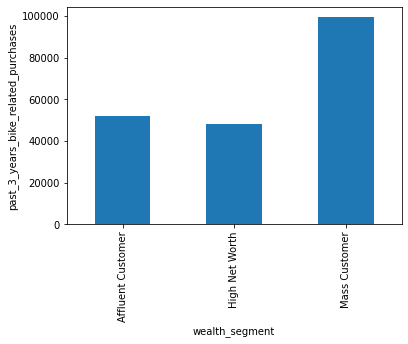

In [98]:
#graph for Wealth segment VS past 3 years bike purchase
df.groupby('wealth_segment').agg('sum')['past_3_years_bike_related_purchases'].plot(kind='bar')
plt.ylabel("past_3_years_bike_related_purchases")

Text(0, 0.5, 'past_3_years_bike_related_purchases')

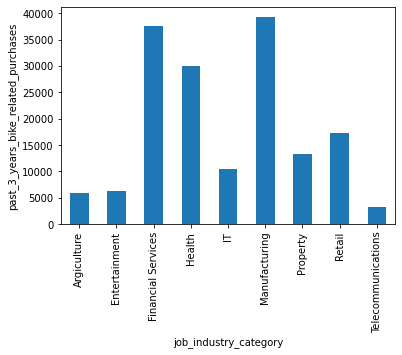

In [99]:
#Job industry vs past 3 year bikes purchase
f.groupby('job_industry_category').agg('sum')['past_3_years_bike_related_purchases'].plot(kind='bar')
plt.ylabel("past_3_years_bike_related_purchases")

# Transactions


In [100]:
d3.shape

(3999, 6)

In [101]:
d2['customer_id']

0        2950
1        3120
2         402
3        3135
4         787
         ... 
19995    1018
19996     127
19997    2284
19998    2764
19999    1144
Name: customer_id, Length: 20000, dtype: int64

In [102]:
d2.drop(['transaction_date'],axis=1,inplace=True)

In [103]:
d2 

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [104]:
d2.drop(['transaction_id','order_status','product_class'],axis=1,inplace=True)

In [105]:
profit=d2['list_price']-d2['standard_cost']#calculating profit from list price and standard cost.
d2.insert(9,'profit',profit)

In [106]:
d2['product_first_sold_date'] = pd.to_timedelta(d2['product_first_sold_date'],unit='D')+pd.to_datetime('1899-12-30')  

In [107]:
d2.isnull().sum()#finding the null values.

product_id                   0
customer_id                  0
online_order               360
brand                      197
product_line               197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
profit                     197
dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hp\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([6520., 2483., 2733.,  750., 2640.,  763.,  823., 1192.,  407.,
        1492.]),
 array([   4.8  ,  174.575,  344.35 ,  514.125,  683.9  ,  853.675,
        1023.45 , 1193.225, 1363.   , 1532.775, 1702.55 ]),
 <a list of 10 Patch objects>)

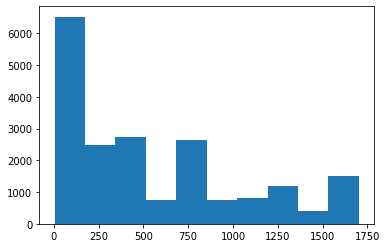

In [108]:
plt.hist(d2['profit'])#histogram of profit


In [109]:
d2.describe()

,product_id,customer_id,online_order,list_price,standard_cost,profit
count,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,45.36465,1738.246050,0.500458,1107.829449,556.046951,551.950915
std,30.75359,1011.951046,0.500013,582.825242,405.955660,493.412849
min,0.00000,1.000000,0.000000,12.010000,7.210000,4.800000
25%,18.00000,857.750000,0.000000,575.270000,215.140000,133.780000
50%,44.00000,1736.000000,1.000000,1163.890000,507.580000,445.210000
75%,72.00000,2613.000000,1.000000,1635.300000,795.100000,830.240000
max,100.00000,5034.000000,1.000000,2091.470000,1759.850000,1702.550000


In [ ]:
#Filling the null values with mean or median

In [110]:
d2['online_order'].fillna(d2['online_order'].mean(),inplace=True)

In [111]:

d2['list_price'].fillna(d2['list_price'].median(),inplace=True)

In [112]:
d2['standard_cost'].fillna(d2['standard_cost'].median(),inplace=True)

In [113]:
d2['profit'].fillna(d2['profit'].median(),inplace=True)

In [114]:
d2.isnull().sum()

product_id                   0
customer_id                  0
online_order                 0
brand                      197
product_line               197
product_size               197
list_price                   0
standard_cost                0
product_first_sold_date    197
profit                       0
dtype: int64

In [115]:
#percentage of null values
miss=d2.isnull().sum()*100/len(d2)

In [116]:
miss

product_id                 0.000
customer_id                0.000
online_order               0.000
brand                      0.985
product_line               0.985
product_size               0.985
list_price                 0.000
standard_cost              0.000
product_first_sold_date    0.985
profit                     0.000
dtype: float64

In [117]:
d2['brand'].value_counts().unique()

array([4253, 3312, 3295, 3043, 2990, 2910], dtype=int64)

In [118]:
d2['brand'].fillna(d2['brand'].value_counts().index[0],inplace=True)

In [119]:
d2['product_line'].fillna(d2['product_line'].value_counts().index[0],inplace=True)

In [120]:
d2['product_size'].fillna(d2['product_size'].value_counts().index[0],inplace=True)

In [121]:
d2.isnull().sum()

product_id                   0
customer_id                  0
online_order                 0
brand                        0
product_line                 0
product_size                 0
list_price                   0
standard_cost                0
product_first_sold_date    197
profit                       0
dtype: int64

In [122]:
d2['product_first_sold_date'].dropna(how='all',inplace=True)

In [123]:
d2.isnull().sum()

product_id                   0
customer_id                  0
online_order                 0
brand                        0
product_line                 0
product_size                 0
list_price                   0
standard_cost                0
product_first_sold_date    197
profit                       0
dtype: int64

In [124]:
d2

,product_id,customer_id,online_order,brand,product_line,product_size,list_price,standard_cost,product_first_sold_date,profit
0,2,2950,0.0,Solex,Standard,medium,71.49,53.62,2012-12-02,17.87
1,3,3120,1.0,Trek Bicycles,Standard,large,2091.47,388.92,2014-03-03,1702.55
2,37,402,0.0,OHM Cycles,Standard,medium,1793.43,248.82,1999-07-20,1544.61
3,88,3135,0.0,Norco Bicycles,Standard,medium,1198.46,381.10,1998-12-16,817.36
4,78,787,1.0,Giant Bicycles,Standard,large,1765.30,709.48,2015-08-10,1055.82
...,...,...,...,...,...,...,...,...,...,...
19995,51,1018,1.0,OHM Cycles,Standard,medium,2005.66,1203.40,2003-07-21,802.26
19996,41,127,1.0,Solex,Road,medium,416.98,312.74,1997-05-10,104.24
19997,87,2284,1.0,OHM Cycles,Standard,medium,1636.90,44.71,2010-08-20,1592.19
19998,6,2764,0.0,OHM Cycles,Standard,medium,227.88,136.73,2004-08-17,91.15


In [125]:
#extracting year from sold date.
d2['year']=d2['product_first_sold_date'].dt.year

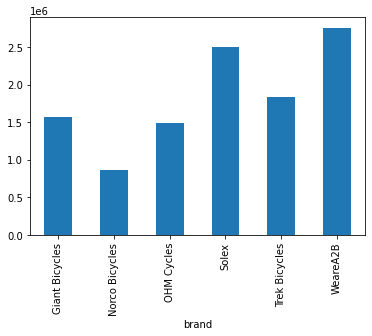

In [126]:
#graph between brand and profit
d2.groupby('brand').agg('sum')['profit'].plot(kind='bar')

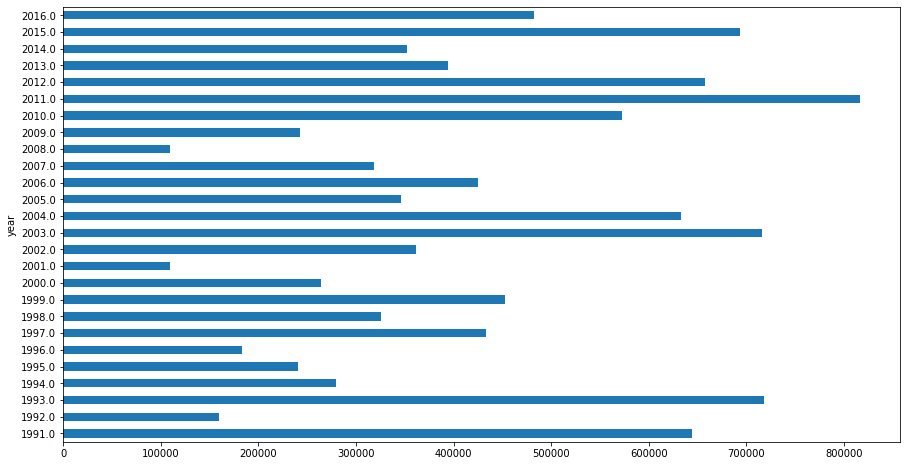

In [127]:
#Yearly profit
d2.groupby('year').agg('sum')['profit'].plot(kind='barh',figsize=(15,8))

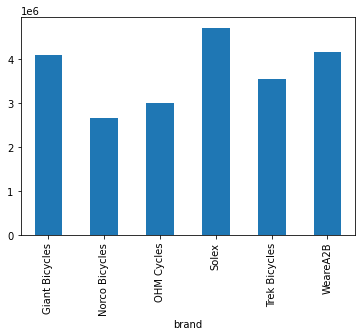

In [128]:
#brand VS list price
d2.groupby('brand').agg('sum')['list_price'].plot(kind='bar')

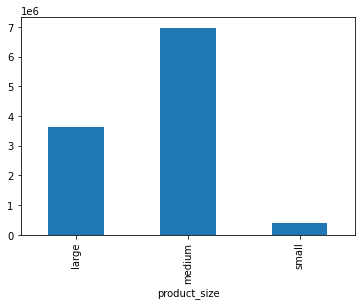

In [129]:
#product size vs profit
d2.groupby('product_size').agg('sum')['profit'].plot(kind='bar')

# CustomerAddress


In [130]:
d3

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [131]:
d3['customer_id'].is_unique

True

In [132]:
d3['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [133]:
#replacing VIC,NSW,QLD to Victoria,New South Wales and Queensland.
d3['state'].replace(['VIC','NSW','QLD'],['Victoria','New South Wales','Queensland'],inplace=True)



In [134]:
d3['state'].unique()

array(['New South Wales', 'Queensland', 'Victoria'], dtype=object)

# Merging datasets

In [135]:
#merging datasets using left merge
d4=pd.merge(df,d3,how='left',on=['customer_id','customer_id'])

d4=df.append(d2)

In [136]:
#finding null values
d4.isnull().sum()

customer_id                              0
first_name                               0
gender                                   0
past_3_years_bike_related_purchases      0
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
Age                                      0
age_bins                                83
address                                  4
postcode                                 4
state                                    4
country                                  4
property_valuation                       4
dtype: int64

In [137]:
d4

,customer_id,first_name,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,age_bins,address,postcode,state,country,property_valuation
0,5,Sheila-kathryn,Female,3997.0,NaN,Affluent Customer,N,Yes,8.0,43.0,"(40.0, 60.0]",17979 Del Mar Point,2448.0,New South Wales,Australia,4.0
1,1098,Maure,Female,99.0,Financial Services,Mass Customer,N,Yes,12.0,31.0,"(20.0, 40.0]",9419 Homewood Way,2160.0,New South Wales,Australia,9.0
2,2332,Jeff,Male,99.0,Property,High Net Worth,N,Yes,10.0,43.0,"(40.0, 60.0]",034 Eagan Avenue,2560.0,New South Wales,Australia,6.0
3,1452,Zachery,Male,99.0,Retail,Mass Customer,N,No,20.0,65.0,"(60.0, 90.0]",913 Londonderry Trail,2567.0,New South Wales,Australia,8.0
4,1457,Leonore,Female,99.0,NaN,Affluent Customer,N,Yes,12.0,42.0,"(40.0, 60.0]",975 Melby Street,2564.0,New South Wales,Australia,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3976,Gretel,Female,0.0,NaN,Affluent Customer,N,Yes,13.0,63.0,"(60.0, 90.0]",07 Morning Court,3805.0,Victoria,Australia,7.0
3996,3549,Jodee,Female,0.0,Retail,Mass Customer,N,No,7.0,54.0,"(40.0, 60.0]",360 Green Ridge Junction,2508.0,New South Wales,Australia,9.0
3997,1046,Shir,Female,0.0,NaN,Affluent Customer,N,No,11.0,65.0,"(60.0, 90.0]",4408 Haas Way,2171.0,New South Wales,Australia,9.0
3998,1529,Tansy,Female,0.0,Financial Services,High Net Worth,N,Yes,5.0,34.0,"(20.0, 40.0]",6750 Truax Trail,2145.0,New South Wales,Australia,8.0


In [138]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   customer_id                          4000 non-null   int64   
 1   first_name                           4000 non-null   object  
 2   gender                               4000 non-null   object  
 3   past_3_years_bike_related_purchases  4000 non-null   float64 
 4   job_industry_category                3344 non-null   object  
 5   wealth_segment                       4000 non-null   object  
 6   deceased_indicator                   4000 non-null   object  
 7   owns_car                             4000 non-null   object  
 8   tenure                               4000 non-null   float64 
 9   Age                                  4000 non-null   float64 
 10  age_bins                             3917 non-null   category
 11  address          

In [139]:
#sorting according to the past 3 years Bikes purchase
d4.sort_values(by=['past_3_years_bike_related_purchases'],inplace=True,ascending=False)

In [140]:
#extracting first 1000 entries as they are our target customers
d5=d4.head(1000)


In [141]:
col=d5.select_dtypes([np.object]).columns
print(col)

Index(['first_name', 'gender', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'address', 'state', 'country'],
      dtype='object')


In [142]:
#dropping unnecessary columns
d5.dropna(subset=['address','postcode','state','country','property_valuation'],inplace=False)
    

,customer_id,first_name,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,age_bins,address,postcode,state,country,property_valuation
0,5,Sheila-kathryn,Female,3997.0,NaN,Affluent Customer,N,Yes,8.0,43.0,"(40, 60]",17979 Del Mar Point,2448.0,New South Wales,Australia,4.0
35,1282,Garald,Male,99.0,Entertainment,Affluent Customer,N,Yes,14.0,40.0,"(20, 40]",791 Elgar Trail,4340.0,Queensland,Australia,5.0
25,2058,Ronna,Female,99.0,Argiculture,High Net Worth,N,No,7.0,42.0,"(40, 60]",9362 Grim Plaza,4702.0,Queensland,Australia,1.0
26,2057,Elianora,Female,99.0,Manufacturing,Affluent Customer,N,Yes,15.0,61.0,"(60, 90]",2807 Northwestern Pass,3182.0,Victoria,Australia,8.0
27,2031,Philbert,Male,99.0,NaN,Mass Customer,N,No,12.0,33.0,"(20, 40]",34 3rd Place,3030.0,Victoria,Australia,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,1869,Neda,Female,73.0,Financial Services,High Net Worth,N,Yes,9.0,43.0,"(40, 60]",765 6th Plaza,4226.0,Queensland,Australia,7.0
1023,961,Rosamund,Female,73.0,Financial Services,Mass Customer,N,No,6.0,34.0,"(20, 40]",382 Dayton Lane,2148.0,New South Wales,Australia,8.0
1022,2219,Ansel,Male,73.0,NaN,High Net Worth,N,Yes,3.0,38.0,"(20, 40]",079 Katie Alley,3216.0,Victoria,Australia,9.0
1032,567,Hashim,Male,73.0,Financial Services,Affluent Customer,N,No,16.0,55.0,"(40, 60]",04 Hansons Street,2087.0,New South Wales,Australia,11.0


In [143]:
d5.dropna(subset=['job_industry_category'],inplace=False)

,customer_id,first_name,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,age_bins,address,postcode,state,country,property_valuation
35,1282,Garald,Male,99.0,Entertainment,Affluent Customer,N,Yes,14.0,40.0,"(20, 40]",791 Elgar Trail,4340.0,Queensland,Australia,5.0
25,2058,Ronna,Female,99.0,Argiculture,High Net Worth,N,No,7.0,42.0,"(40, 60]",9362 Grim Plaza,4702.0,Queensland,Australia,1.0
26,2057,Elianora,Female,99.0,Manufacturing,Affluent Customer,N,Yes,15.0,61.0,"(60, 90]",2807 Northwestern Pass,3182.0,Victoria,Australia,8.0
28,2013,Marge,Female,99.0,Health,Affluent Customer,N,Yes,19.0,25.0,"(20, 40]",06069 Hayes Road,2099.0,New South Wales,Australia,8.0
30,182,Lydon,Male,99.0,Financial Services,Affluent Customer,N,Yes,7.0,28.0,"(20, 40]",83012 Dapin Lane,4300.0,Queensland,Australia,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,1110,Lazar,Male,73.0,Retail,High Net Worth,N,No,12.0,29.0,"(20, 40]",9 Dayton Alley,3757.0,Victoria,Australia,7.0
1013,1869,Neda,Female,73.0,Financial Services,High Net Worth,N,Yes,9.0,43.0,"(40, 60]",765 6th Plaza,4226.0,Queensland,Australia,7.0
1023,961,Rosamund,Female,73.0,Financial Services,Mass Customer,N,No,6.0,34.0,"(20, 40]",382 Dayton Lane,2148.0,New South Wales,Australia,8.0
1032,567,Hashim,Male,73.0,Financial Services,Affluent Customer,N,No,16.0,55.0,"(40, 60]",04 Hansons Street,2087.0,New South Wales,Australia,11.0


In [144]:
d5.isnull().sum()


customer_id                              0
first_name                               0
gender                                   0
past_3_years_bike_related_purchases      0
job_industry_category                  171
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
Age                                      0
age_bins                                19
address                                  1
postcode                                 1
state                                    1
country                                  1
property_valuation                       1
dtype: int64

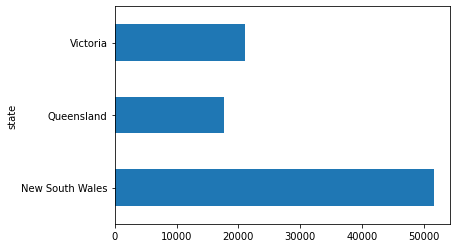

In [145]:
#state vs past 3 years bike purchase
d5.groupby('state').agg('sum')['past_3_years_bike_related_purchases'].plot(kind='barh')

In [146]:
#creating a range in Age column
d5['age_bins'] = pd.cut(x=d5['Age'], bins=[20, 40, 60, 90])
d5

<ipython-input-146-3eb66034c8fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d5['age_bins'] = pd.cut(x=d5['Age'], bins=[20, 40, 60, 90])


,customer_id,first_name,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,age_bins,address,postcode,state,country,property_valuation
0,5,Sheila-kathryn,Female,3997.0,NaN,Affluent Customer,N,Yes,8.0,43.0,"(40, 60]",17979 Del Mar Point,2448.0,New South Wales,Australia,4.0
35,1282,Garald,Male,99.0,Entertainment,Affluent Customer,N,Yes,14.0,40.0,"(20, 40]",791 Elgar Trail,4340.0,Queensland,Australia,5.0
25,2058,Ronna,Female,99.0,Argiculture,High Net Worth,N,No,7.0,42.0,"(40, 60]",9362 Grim Plaza,4702.0,Queensland,Australia,1.0
26,2057,Elianora,Female,99.0,Manufacturing,Affluent Customer,N,Yes,15.0,61.0,"(60, 90]",2807 Northwestern Pass,3182.0,Victoria,Australia,8.0
27,2031,Philbert,Male,99.0,NaN,Mass Customer,N,No,12.0,33.0,"(20, 40]",34 3rd Place,3030.0,Victoria,Australia,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,1869,Neda,Female,73.0,Financial Services,High Net Worth,N,Yes,9.0,43.0,"(40, 60]",765 6th Plaza,4226.0,Queensland,Australia,7.0
1023,961,Rosamund,Female,73.0,Financial Services,Mass Customer,N,No,6.0,34.0,"(20, 40]",382 Dayton Lane,2148.0,New South Wales,Australia,8.0
1022,2219,Ansel,Male,73.0,NaN,High Net Worth,N,Yes,3.0,38.0,"(20, 40]",079 Katie Alley,3216.0,Victoria,Australia,9.0
1032,567,Hashim,Male,73.0,Financial Services,Affluent Customer,N,No,16.0,55.0,"(40, 60]",04 Hansons Street,2087.0,New South Wales,Australia,11.0


Text(0, 0.5, 'past_3_years_bike_related_purchases')

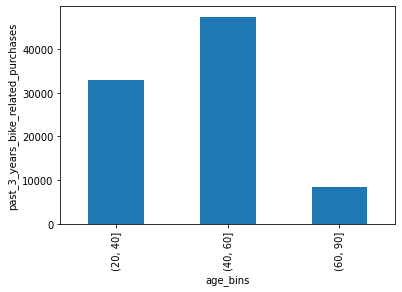

In [147]:
#target customer's age range of purchase
d5.groupby('age_bins').agg('sum')['past_3_years_bike_related_purchases'].plot(kind='bar')
plt.ylabel('past_3_years_bike_related_purchases')

Text(0, 0.5, 'past_3_years_bike_related_purchases')

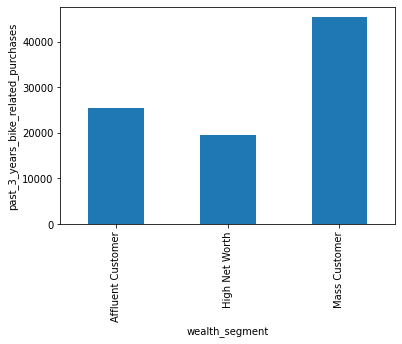

In [148]:
#target wealth segment
d5.groupby('wealth_segment').agg('sum')['past_3_years_bike_related_purchases'].plot(kind='bar')
plt.ylabel('past_3_years_bike_related_purchases')

Text(0, 0.5, 'past_3_years_bike_related_purchases')

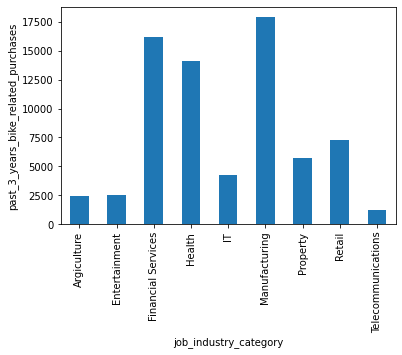

In [149]:
#target job industry
d5.groupby('job_industry_category').agg('sum')['past_3_years_bike_related_purchases'].plot(kind='bar')
plt.ylabel('past_3_years_bike_related_purchases')

In [152]:
s=d5['owns_car'].value_counts()
t=d5['state'].value_counts()

Text(0, 0.5, 'owns_car')

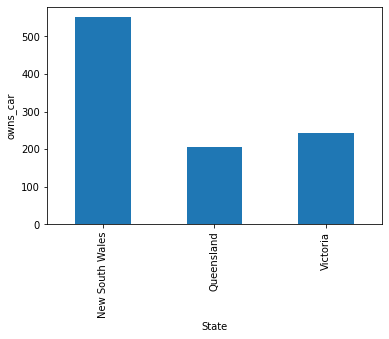

In [158]:
#state that own cars
d5.groupby('state').agg('count')['owns_car'].plot(kind='bar')
plt.xlabel('State')
plt.ylabel('owns_car')

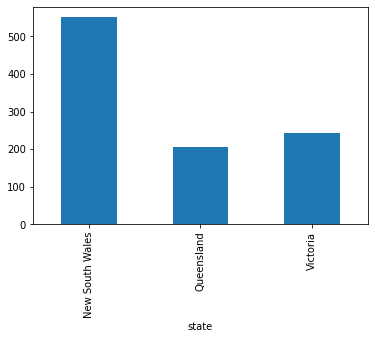

In [163]:
#target state VS past 3 year's bike purchase
d5.groupby('state').agg('count')['past_3_years_bike_related_purchases'].plot(kind='bar')

In [167]:
#saving the 1000 target customer's data in csv file.
d5.to_csv('/Users/hp/Downloads/Courses/KMPG/d5.csv')